<a href="https://colab.research.google.com/github/mohammdd75965/Heart-Disease-UCI/blob/main/Copy_of_Untitled4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
tr=pd.read_csv('/content/drive/MyDrive/heart.csv')


In [ ]:
tr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


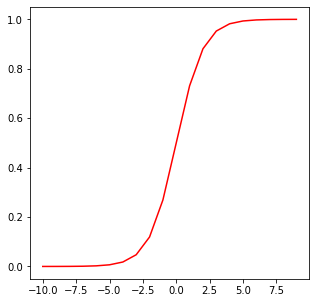

In [ ]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))
nums = np.arange(-10, 10, step=1)

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(nums, sigmoid(nums), 'r')


In [ ]:
'''def cost(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    return np.sum(first - second) / (len(X))
'''

'def cost(theta, X, y):\n    theta = np.matrix(theta)\n    X = np.matrix(X)\n    y = np.matrix(y)\n    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))\n    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))\n    return np.sum(first - second) / (len(X))\n'

In [ ]:
tr.drop(['age','sex','cp','fbs','restecg','exang','slope','ca','thal'],axis=1,inplace=True)


In [ ]:
tr

,trestbps,chol,thalach,oldpeak,target
0,145,233,150,2.3,1
1,130,250,187,3.5,1
2,130,204,172,1.4,1
3,120,236,178,0.8,1
4,120,354,163,0.6,1
...,...,...,...,...,...
298,140,241,123,0.2,0
299,110,264,132,1.2,0
300,144,193,141,3.4,0
301,130,131,115,1.2,0


In [ ]:
X=tr.iloc[:,:-1]

In [ ]:
X

,trestbps,chol,thalach,oldpeak
0,145,233,150,2.3
1,130,250,187,3.5
2,130,204,172,1.4
3,120,236,178,0.8
4,120,354,163,0.6
...,...,...,...,...
298,140,241,123,0.2
299,110,264,132,1.2
300,144,193,141,3.4
301,130,131,115,1.2


In [ ]:
y=tr.iloc[:,-1]
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X = (X - np.min(X)) / (np.max(X) - np.min(X)).values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle =True)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train, y_train)

# Predicting the Test set results
y_pred = log.predict(X_test)
print('LogisticRegression Train Score is : ' , log.score(X_train, y_train))
print('LogisticRegression Test Score is : ' , log.score(X_test, y_test))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm


LogisticRegression Train Score is :  0.768595041322314
LogisticRegression Test Score is :  0.6229508196721312


array([[15, 16],
       [ 7, 23]])

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

0.3770491803278688

In [ ]:
from sklearn.metrics import median_absolute_error
median_absolute_error(y_test, y_pred)

0.0

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='micro')

0.6229508196721312

In [ ]:
X_train=X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values


In [ ]:
X_train

array([[0.52830189, 0.27625571, 0.76335878, 0.24193548],
       [0.41509434, 0.38356164, 0.26717557, 0.30645161],
       [0.24528302, 0.32648402, 0.38167939, 0.03225806],
       [0.41509434, 0.26712329, 0.61832061, 0.        ],
       [0.62264151, 0.2739726 , 0.3740458 , 0.        ],
       [0.50943396, 0.17579909, 0.6870229 , 0.        ],
       [0.35849057, 0.51826484, 0.46564885, 0.19354839],
       [0.33962264, 0.16210046, 0.61832061, 0.19354839],
       [0.32075472, 0.20547945, 0.33587786, 0.        ],
       [0.33962264, 0.16210046, 0.45801527, 0.09677419],
       [0.43396226, 0.19406393, 0.71755725, 0.        ],
       [0.24528302, 0.38584475, 0.65648855, 0.09677419],
       [0.71698113, 0.456621  , 0.52671756, 0.5483871 ],
       [0.58490566, 0.2716895 , 0.54961832, 0.        ],
       [0.16981132, 0.37442922, 0.6259542 , 0.        ],
       [0.24528302, 0.23515982, 0.44274809, 0.41935484],
       [0.43396226, 0.44520548, 0.84732824, 0.        ],
       [0.43396226, 0.61187215,

In [ ]:
y_train

array([1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1])

In [ ]:
X_train = X_train.T
y_train = y_train.reshape(1, X_train.shape[1])

X_test = X_test.T
y_test = y_test.reshape(1, X_test.shape[1])


In [ ]:
print("Shape of X_train : ", X_train.shape)
print("Shape of Y_train : ", y_train.shape)
print("Shape of X_test : ", X_test.shape)
print("Shape of Y_test : ", y_test.shape)

Shape of X_train :  (4, 242)
Shape of Y_train :  (1, 242)
Shape of X_test :  (4, 61)
Shape of Y_test :  (1, 61)


In [ ]:
def model(X, Y, learning_rate, iterations):
    
    m = X_train.shape[1]
    n = X_train.shape[0]
    
    W = np.zeros((n,1))
    B = 0
    
    cost_list = []
    
    for i in range(iterations):
        
        Z = np.dot(W.T, X) + B
        A = sigmoid(Z)
        
        # cost function
        cost = -(1/m)*np.sum( Y*np.log(A) + (1-Y)*np.log(1-A))
        
        # Gradient Descent
        dW = (1/m)*np.dot(A-Y, X.T)
        dB = (1/m)*np.sum(A - Y)
        
        W = W - learning_rate*dW.T
        B = B - learning_rate*dB
        
        # Keeping track of our cost function value
        cost_list.append(cost)
        
        if(i%(iterations/10) == 0):
            print("cost after ", i, "iteration is : ", cost)
        
    return W, B, cost_list

In [ ]:
iterations = 1000000
learning_rate = 0.002
W, B, cost_list = model(X_train, y_train, learning_rate = learning_rate, iterations = iterations)


cost after  0 iteration is :  0.6931471805599453
cost after  100000 iteration is :  0.5178285036952534
cost after  200000 iteration is :  0.5072104127536037
cost after  300000 iteration is :  0.5054775384707587
cost after  400000 iteration is :  0.505088402229578
cost after  500000 iteration is :  0.5049848175750005
cost after  600000 iteration is :  0.5049541909114019
cost after  700000 iteration is :  0.5049445138051308
cost after  800000 iteration is :  0.5049413262576038
cost after  900000 iteration is :  0.5049402487908322


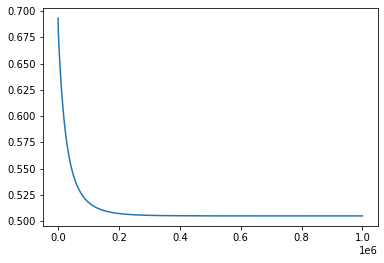

In [ ]:
plt.plot(np.arange(iterations), cost_list)
plt.show()

In [ ]:
def accuracy(X, Y, W, B):
    
    Z = np.dot(W.T, X) + B
    A = sigmoid(Z)
    
    A = A > 0.5
    
    A = np.array(A, dtype = 'int64')
    
    acc = (1 - np.sum(np.absolute(A - Y))/Y.shape[1])*100
    
    print("Accuracy of the model is : ", round(acc, 2), "%")

In [ ]:
accuracy(X_test, y_test, W, B)

Accuracy of the model is :  67.21 %
